# 선형 회귀 모델

선형 회귀(Linear Regression) 모델은 선형 회귀식을 활용한 모델임
선형 회귀 모델을 훈련한단느 것은 훈련 데이터에 잘 맞는 모델 파라미터, 즉 회귀계수를 찾는 것임

데이터 생성 -> 모델 훈련 -> 회귀선 그래프 확인 순서로 진행해보겠음

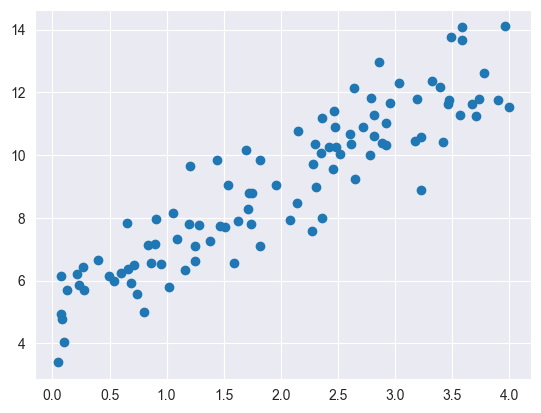

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # 시드값 고정

w0 = 5 # y 절편
w1 = 2 # 회귀계수
noise = np.random.randn(100, 1) # 노이즈

x = 4 * np.random.rand(100, 1) # 0 ~ 4 사이 실수형 난수 100개 생성 (x값)
y = w1 * x + w0 + noise # y값

plt.scatter(x, y)

## 데이터 생성

line 8: np.random.randn(100, 1)은 표준 정규분포를 따르는 데이터 100개를 생성하는 코드임
데이터에 노이즈를 추가하기 위해 작성되었음

line 10: np.random.randn(100, 1)은 0 ~ 1 사이의 랜던값 100개를 생성함 독립변수 x값 100개를 만드는 효과를 가짐
이렇게 노이즈를 포함하여 y = 2x + 5에 근사하는 데이터 100개를 생성하였음

In [2]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x, y)

print("y절편(w0):", linear_reg_model.intercept_)
print("회귀계수(w1):", linear_reg_model.coef_)

y절편(w0): [5.09772262]
회귀계수(w1): [[1.9808382]]


## 모델 훈련

y절편 값은 LinearRegression 모델의 intercept_ 속성에, 회귀계수 값은 coef_ 속성에 저장되어 있음
이 값을 통해 알아본 결과 y절편에 5.09772262, 회귀계수로 1.9808382인 것으로 보아 적당히 잘 한 듯

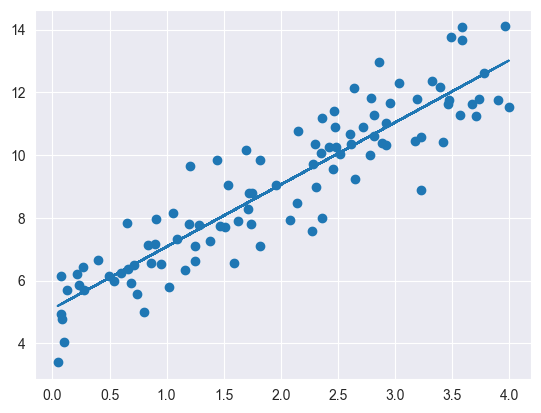

In [3]:
y_pred = linear_reg_model.predict(x) # 예측

plt.scatter(x, y)
plt.plot(x, y_pred) # 선형 회구선 그리기

## 회귀선 확인

예측값을 이용하여 회귀선을 그려보았음
캐글에서 단순 선형 회귀 모델을 사용할 일은 거의 없겠지만
가장 간단한 모델이라 적어봄

# 로지스틱 회귀 모델

로지스틱 회귀(Logistic Regression)는 선형 회귀 방식을 응용하여 분류에 적용한 모델임
예를 들어, 스팸 메일일 확률을 구하는 이진 분류 문제에 로지스틱 회귀를 사용할 수 있음

로지스틱 회귀는 시그모이드 함수(Sigmoid Function)를 활용하여 타깃값에 포함될 확률을 예측함

.
$p = \frac{1}{1 + e^{-x}}$
.

시그모이드 함수는 0 ~ 1의 값을 가짐
x값이 작을수록 0에 가깝고, 클수록 1에 가까움
x = 0일 때 0.5임
이 값을 그대로 확률로 해석하면 타깃값에 포함될 확률이 구해짐

이진 분류 문제에선 시그모이드 값(확률)이 0.5보다 작으면 0(음성), 이상이면 1(양성)으로 예측함

사이킷런에서 제공하는 로지스틱 회귀 모델은 LogisticRegression임
다른 사이킷런 모델과 마찬가지로 predict() 함수로 타깃값을 예측할 수 있고, predict_proba()함수로 타깃값일 확률을 예측할 수 있음

# 결정 트리

'의사결정 나무'라고도 하는 결정 트리(Decision Tree)는 분류와 회귀 문제에 모두 사용 가능한 모델임

1. 우선 데이터를 가장 잘 구분하는 조건을 정함
2. 조건을 기준으로 데이터를 두 범주로 나눔
3. 나뉜 각 범주의 데이터를 잘 구분하는 조건을 다시 정함
4. 조건에 따라 각 범주에 속한 데이터를 다시 분할함
5. 이런 식으로 계속 분할하여 최종 결정 값을 구함

스무고개하는 방식과 비슷힘


## 결정 트리 분할 방식

결정 트리를 만들 때는 분할 조건이 중요함
조건에 따라 분할 후 반들어지는 트리 모양(과 동작 효율)이 다르기 때문임

머신러닝에서 결정 트리는 노드 내 데이터의 불순도를 최소화하는 방향으로 분할함
불순도(Impurity)는 한 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 나타내는 정도임

한 범주에 데이터 한 종류만 있다면 불순도가 최소(혹은 순도가 최대)고, 서로 다른 데이터가 같은 비율로 있다면 불순도가 최대(혹은 순도가 최소)임

불순도를 측정하는 지표로는 엔트로피와 지니 불순도가 있으며, 결정 트리를 만들 때 선택할 수 있음

엔트로피(Entropy)란 '불확실한 정도'를 의미함
예를 들어 한 범주에 데이터가 한 종류만 있다면 엔트로피는 0임
어떤 데이터를 고르든 그 종류를 '확실하게' 말할 수 있기 때문임
반대로 서로 다른 데이터의 비율이 비등해질수록 엔트로피는 1에 가까워짐
다시 말해, 엔트로피 값이 클수록 불순도가 높고, 작을수록 불순도도 낮음
1에서 엔트로피를 뺀 수치(1 - 엔트로피)를 정보 이득(Information Gain)이라고 하는데, 결정 트리는 이 정보 이득을 최대화하는 방향(엔트로피를 최소화하는 방향)으로 노드를 분할함

지니 불순도(Gini Impurity)도 엔트로피와 비슷한 개념임
지니 불순도 값이 클수록 불순도도 높고, 작을수록 불순도도 낮음
엔트로피와 마찬가지로 지니 불순도가 낮아지는 방향으로 노드를 분할함


## 결정 트리 구현

사이킷런으로 결정 트리를 구현할 수 있음
분류용 모델은 DecisionTreeClassifier, 회귀용 모델은 DecisionTreeRegressor임
여기서는 분류 모델인 DecisionTreeClassifier를 기준으로 구현하도록 함

DecisionTreeClassifier의 파라미터: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

결정 트리에 조건이 많을수록 분할이 많고 트리가 깊어짐
분할을 지나치게 많이 하면 모델이 과대적합될 우려가 있으니 파라미터를 잘 조절해야함
max_depth, min_samples_split, min_samples_leaf가 결정 트리의 과대적합을 제어하는 파라미터임

다음은 유방암 데이터셋으로 결정 트리 모델의 정확도를 측정하는 코드임

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터셋 불러오기
cancer_data = load_breast_cancer()

# 훈련, 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(cancer_data['data'],
                                                    cancer_data['target'],
                                                    stratify=cancer_data['target'],
                                                    test_size=0.4,
                                                    random_state=42)

decisiontree = DecisionTreeClassifier(random_state=42) # 결정 트리 정의
decisiontree.fit(x_train, y_train) # 모델 훈련

accuracy = decisiontree.score(x_test, y_test) # 정확도 측정

# 테스트 데이터를 활용하여 결정 트리 모델 정확도를 출력
print(f"결정 트리 정확도: {accuracy:.3f}")

결정 트리 정확도: 0.930


# 앙상블 학습

우리는 제품을 구매할 때 다양한 후기를 보며 살지 말지를 정함
가능한 한 많은 후기를 보고 제품에 대해 종합적으로 판단함
문제를 풀때도 한 명이 푸는 것보다 여러 명이 풀어서 서로 비교해보는 게 나음
전문가 한 명의 의견보다 여러 명의 종합 의견이 더 정확할 가능성이 큼

머신러닝에서도 마찬가지인데, 다양한 모델이 내린 예측 결과를 결합하는 기법을 앙상블 학습(Ensemble Learning)이라고 함
앙상블 학습을 활용하면 대체로 예측 성능이 좋아짐
과대적합 방지 효과도 있음
그래서 캐글러들은 앙상블 기법을 많이 활용함

앙상블 학습 유형으로는 보팅, 배길, 부스팅 등이 있음

## 보팅

서로 다른 모델로 예측한 결과가 여러 있다고 하자, 개별 결과를 종합해 최종 결과를 결정하는 방식을 보팅(Voting)이라고 함
보팅 기법은 하드 보팅과 소프트 보팅으로 나뉨

하드 보팅(Hard Voting)은 '다수결 투표' 방식으로 최종 예측값을 정함
예를 들어, 모델 세 개는 타깃값을 1로 예측하고, 모델 두 개는 0으로 예측했다고 하자
그러면 다수결에 의해 1이 최종 예측값으로 선정됨
가장 많은 표를 얻은 개별 예측값을 최종 예측값을 정한 것

소프트 보팅(Soft Voting)은 개별 예측 확률들의 평균을 최종 예측확률로 정하는 방식임

일반적으로 소프트보팅이 하드 보팅보다 성능이 좋기 때문에, 대체로 소프트 보팅을 사용함

## 배깅

배깅(Bagging)은 개별 모델로 예측한 결과를 결합해 최종 예측을 정하는 기법임
배깅의 특징은 '개별 모델이 서로 다른 샘플링 데이터를 활용'한다는 점임

1. 전체 훈련 데이터셋에서 무작위 샘플링한 데이터로 개별 모델을 훈련함
2. 훈련된 개별 모델로 결과를 예측함
3. 개별 모델의 수만큼 1 ~ 2번 작업을 반복함
4. 각 모델이 예측한 값들을 보팅하여 최종 예측값을 구함

배경인 원리가 간단하면서도 성능을 높일 수 있는 효과적인 기법임
배깅 기법을 활용한 대표적인 모델이 랜덤 포레스트임

## 부스팅

부스팅(Boosting)은 가중치를 활용해 분류 성능이 약한 모델을 강하게 만드는 기법임

배깅은 결정 트리 1과 결정 트리 2가 서로 독립적으로 결과를 예측한 다음 보팅하여 최종 결과를 도출함
하지만 부스팅에서는 '모델 간 협력'이 이루어짐
예컨데, 이전 모델이 잘못 예측한 데이터에 가중치를 부여함
다음 모델은 이전 모델이 잘못 예측한 데이터(가중치가 부여된 데이터)에 더 집중해 훈련함
갖우치가 부여된 데이터를 그만큼 더 중요하다고 판단해 더 잘 분류하려고 함
이런 단계를 반복하면 모델 성능이 점차 향상됨

부스팅 기법을 활용한 대표적인 모델로는 XGBoost와 LightGBM 등이 있음

## 랜덤 포레스트

랜덤 포레스트(Random Forest)는 결정 트리를 배깅 방식으로 결합한 모델임
나무가 모여 숲을 이루듯 결정 트리가 모여 랜덤 포레스트를 구성함
결정 트리와 마찬가지로 랜덤 포레스트도 분류와 회귀 문제에 모두 적용 가능함

스팸 메일을 예시로 들면
결정 트리 A, B, C, D가 있다 할 때

1. 먼저 훈련 데이터셋에서 샘플링(복원 추출)해서 훈련 데이터셋 A를 만듦
2. 결정 트리 A는 훈련 데이터셋 A를 활용하여 훈련함
3. 테스트 데이터로 예측해서 스팸일 확률과 일반 메일일 확률을 구함
4. 같은 방식으로 다른 결정트리들도 훈련과 예측을 반복함
5. 마지막으로 네 개 확률의 평균을 냄

각 결정 트리에서 사용하는 데이터는 전체 훈련 데이터에서 각자 샘플링함
그렇기 때문에 결정 트리마다 훈련 데이터 샘플이 다름
단, 전체 훈련 데이터셋 수만큼 복원 추출하므로 샘플링한 데이터의 크기는 서로 같음

### 랜덤 포레스트 구현

사이킷런으로 랜덤 포레스트를 구현할 수 있음
분류 모델은 RandomForestClassifier, 회귀 모델은 RandomForestRegressor임
여기서는 회귀 모델을 구현하도록 함

랜덤 포레스트는 결정 트리 묶음이라서 파라미터도 결정트리와 거의 같음: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터셋 불러오기
cancer_data = load_breast_cancer()
# 훈련, 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(cancer_data["data"],
                                                    cancer_data["target"],
                                                    stratify=cancer_data["target"],
                                                    test_size=0.4,
                                                    random_state=42)

randomforest = RandomForestClassifier(random_state=42) # 랜덤 포레스트 정의
randomforest.fit(x_train, y_train) # 모델 훈련

accuracy = randomforest.score(x_test, y_test) # 정확도 측정

# 테스트 데이터를 활용하여 랜덤 포레스트 모델 정확도 출력
print(f"랜덤 포레스트 정확도: {accuracy:.3f}")

랜덤 포레스트 정확도: 0.939


결정 트리 사용 당시 정확도는 0.930이었으니 약간 좋아진 듯

# XGBoost

XGBoost(Exrteme Gradient Boosting)는 성능이 우수한 트리 기반 부스팅 알고리즘임
많은 캐글 우승자가 XGBoost를 사용할 정도로 성능이 좋은 모델임

랜덤 포레스트는 결정 트리를 병렬로 배치하지만, XGBoost는 직렬로 배치해 사용함
즉 랜덤 포레스트는 배깅 방식, XGBoost는 부스팅 방식임
부스팅 방식이기 때문에 직전 트리가 예측한 값을 다음 으틸가 활용해서 예측값을 조금씩 수정함

XGBoost의 주요 모듈은 C와 C++로 작성되었지만, 파이썬으로도 XGBoost를 사용할 수 있음
이를 파이썬 래퍼 XGBoost라 하고, 사이킷런과 호환되는 XGBoost를 사이킷런 래퍼 XGBoost라고 함
사이킷런 래퍼 XGBoost는 fit(), predict() 등의 메소드를 사용할 수 있음

파이썬 래퍼 XGBoost와 사이킷런 래퍼 XGBoost는 서로 크게 차이 없음
다만 파이썬 래퍼 XGBoost를 사용하려면 별도 데이터셋을 생성해야함
그러면 모델 훈련 및 예측 부분이 더 명시적이게 됨

파이썬 래퍼 XGBoost를 사용하려면 DMatrix 객체를 활용해 XGBoost 전용 데이터셋을 만들어야함
xgboost 독스: https://xgboost.readthedocs.io/en/stable/

# LightGBM

마이크로소프트에서 개발한 LightGBM은 XGBoost와 더불어 성능이 우수한 알고리즘임
XGBoost와 성능은 비슷하지만 훈련 속도가 더 빨라서 많은 캐글러가 애용하는 머신러닝 모델임

대부분의 트리 기반 모델은 트리를 균형 있게 분할하며 훈련함
그래야 트리 깊이가 최소화되고, 과적합도 방지할 수 있기 때문임
하지만 균형을 유지하려면 추가 연산이 필요함
시간이 더 걸린다는 뜻임

반면 LightGBM은 말단 노드 중심으로 예측 오류를 최소화하게끔 분할함
말단 노드 중심으로 분할하면 균형을 유지할 필요가 없음
균형을 유지할 필요가 없으니 추가 연산도 필요 없음
따라서 균형 중심 분할에 비해 더 빠름
하지만 데이터 개수가 적을 때는 과적합되기 쉽다는 단점이 생겨서 과적합 방지용 하이퍼파라미터를 조정해줘야함

LightGBM은 XGBoost와 마찬가지로 파있너 래퍼 모듈과 사이킷런 래퍼 모듈이 있음
여기서도 파이썬 래퍼 모듈로 설명함

XGBoost와 LightGBM의 특장점
1. 피처 스케일링이 따로 필요 없음. 데이터의 절대적인 크기보다는 대소 관계에 영향을 받기 때문임.
2. 레이블 인코딩을 적용해도 됨. 레이블 인코딩은 단점이 있다고 했지만, 트리 기반 모델의 특성상 분기를 거듭하면서 레이블 인코딩된 피처에서도 정보를 잘 추출할 수 있기 때문임
3. 결측값을 알아서 처리해줌(그럼에도 더 명확하게 하려면 결측값을 별도로 처리하는 습관을 들이는 게 바람직함)

반면 선형 모델은 피처 스케일리으 결측값 처리, 원-핫 인코딩을 해줘야 일반적으로 성능이 좋아짐

파이썬 래퍼 LightGBM을 사용하려면 lightgbm.Dataset()으로 전용 데이터셋을 만들어줘야함
API는 다음과 같음: https://lightgbm.readthedocs.io/en/latest/Python-API.html#